<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

3.4.1


## Data preparation

In [11]:
df = pd.read_csv('../input/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [12]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [13]:
df.date = pd.to_datetime(df.date)

In [14]:
plotly_df(df.set_index('date')[['count']])

In [15]:
from fbprophet import Prophet

In [16]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426
- 5229
- 2744

Ответ: 3426

In [17]:
# You code here
train_df = df[:-predictions] #отрезаем от обучающей выборки последние 30 точек, чтобы замерить на них качество
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


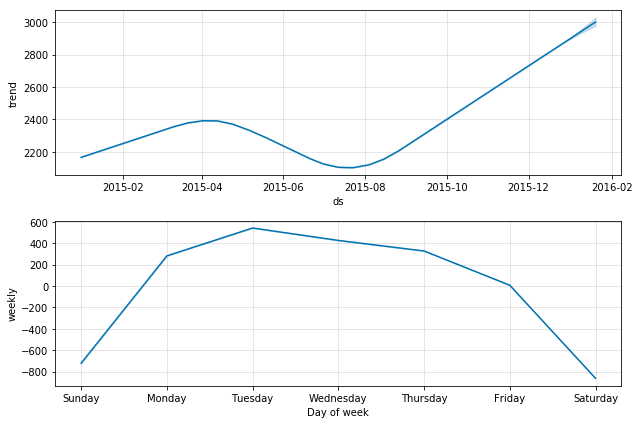

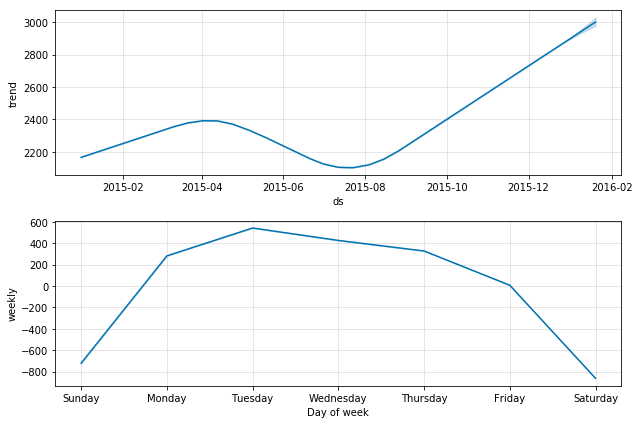

In [18]:
m.plot_components(forecast)

In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2979.319903,1691.428495,2543.336855,2961.055292,3001.402309,-861.693311,-861.693311,-861.693311,-861.693311,-861.693311,-861.693311,0.0,0.0,0.0,2117.626592
379,2016-01-17,2984.727592,1886.833936,2673.931099,2965.293204,3008.079428,-720.705354,-720.705354,-720.705354,-720.705354,-720.705354,-720.705354,0.0,0.0,0.0,2264.022238
380,2016-01-18,2990.135281,2871.907002,3685.637220,2969.651944,3015.089402,281.357669,281.357669,281.357669,281.357669,281.357669,281.357669,0.0,0.0,0.0,3271.492950
381,2016-01-19,2995.542971,3133.023023,3948.012305,2974.122374,3022.193880,541.423837,541.423837,541.423837,541.423837,541.423837,541.423837,0.0,0.0,0.0,3536.966808
382,2016-01-20,3000.950660,3016.554520,3841.400295,2978.259529,3029.583797,425.547911,425.547911,425.547911,425.547911,425.547911,425.547911,0.0,0.0,0.0,3426.498570


Estimate the quality of the prediction with the last 30 points.

In [28]:
# You code here
predicted_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
predicted_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-01,2493.394569,2071.273908,2897.342367,1414
2015-01-02,2176.170858,1770.811704,2568.752154,1920
2015-01-03,1310.164121,872.000201,1727.503540,1338
2015-01-04,1453.891639,1048.905598,1855.642801,1404
2015-01-05,2458.694224,2061.837564,2894.084354,2264


In [29]:
predicted_df['e_abs'] = np.abs(predicted_df['y'] - predicted_df['yhat'])
mae = np.sum(predicted_df[-predictions:]['e_abs']) / predictions
predicted_df['p'] = predicted_df['e_abs'] / predicted_df['y']
mape = np.sum(predicted_df[-predictions:]['p']) * 100 / predictions
print(round(mae,2))
print(round(mape,2))

599.84
34.5


**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600
- 903

Ответы:
2 - 34.5
3 - 600

## Predicting with ARIMA

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

Ответ: Series is not stationary, p_value = 0.107

In [23]:
# You code here
import statsmodels.tsa.stattools as ts
stat = ts.adfuller(train_df['y'])
print(stat[1])

0.1073921962761209


In [31]:
print(stat)

(-2.534117843418302, 0.1073921962761209, 15, 337, {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}, 4878.896813791136)


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

 Ответ: D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1

In [24]:
# You code here
train_df.set_index('ds', inplace=True)

In [25]:
%%time
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
results1 = []
best_aic = float("inf")
param_gen = ((Ds, ds, Qs,qs, Ps, ps) for Ds in range(0, 3) for ds in range(0, 2) for Qs in range(0, 2) for qs in range(0, 3) for Ps in range(0, 4) for ps in range(0, 2))
for Ds, ds, Qs, qs, Ps, ps in param_gen:
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(ps, ds, qs), seasonal_order=(Ps, Ds, Qs, 7)).fit(disp=-1)
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = (Ds, ds, Qs, qs, Ps, ps)
    results1.append([(Ds, ds, Qs, qs, Ps, ps), model.aic])

CPU times: user 11min 13s, sys: 11min, total: 22min 13s
Wall time: 5min 48s


In [26]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters', 'aic']
print(result_table1.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
232  (2, 1, 1, 2, 3, 0)  4961.632628
227  (2, 1, 1, 1, 3, 1)  4962.828862
179  (2, 0, 1, 0, 3, 1)  4973.212241
190  (2, 0, 1, 2, 3, 0)  4980.827422
184  (2, 0, 1, 1, 3, 0)  4983.669858


In [32]:
answer_mask = result_table1['parameters'].isin([(1, 0, 0, 2, 3, 1),
                                                (2, 1, 1, 2, 3, 1),
                                                (1, 1, 1, 2, 3, 1),
                                                (0, 0, 0, 2, 3, 1)])
result_table1[answer_mask]

,parameters,aic
77,"(1, 0, 0, 2, 3, 1)",5022.312527
149,"(1, 1, 1, 2, 3, 1)",5019.555903
233,"(2, 1, 1, 2, 3, 1)",4988.968773
